In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

sp= pd.read_csv("studentperformance.csv")

sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [3]:
sp.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [4]:
new_sutun = ['Gender','Race','Parent_level','Lunch','test_preparation_course',"math_score","reading_score","writing_score"]
sp.columns = new_sutun


In [5]:
sp.head(10)

,Gender,Race,Parent_level,Lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [6]:
sp.Parent_level.unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [7]:
def aileyi_kategorize_et(adet):
    if adet == 'some high school':
        return 1
    elif adet =='high school':
        return 2
    elif adet =="associate's degree":
        return 3
    elif adet =="bachelor's degree":
        return 4
    elif adet =='some college':
        return 5
    else:
        return 6

In [8]:
sp['aile_grup'] =sp['Parent_level'].apply(aileyi_kategorize_et)
display(sp.head())
sp.groupby("aile_grup")["Parent_level"].count()

,Gender,Race,Parent_level,Lunch,test_preparation_course,math_score,reading_score,writing_score,aile_grup
0,female,group B,bachelor's degree,standard,none,72,72,74,4
1,female,group C,some college,standard,completed,69,90,88,5
2,female,group B,master's degree,standard,none,90,95,93,6
3,male,group A,associate's degree,free/reduced,none,47,57,44,3
4,male,group C,some college,standard,none,76,78,75,5


aile_grup
1    179
2    196
3    222
4    118
5    226
6     59
Name: Parent_level, dtype: int64

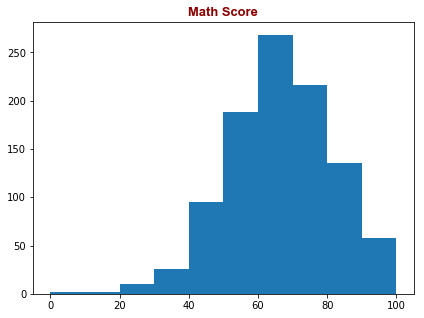

In [9]:
plt.figure(figsize = (15,5))
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.subplot(1,2,2)
plt.hist(sp["math_score"])
plt.title("Math Score", fontdict=baslik_font)
plt.show()

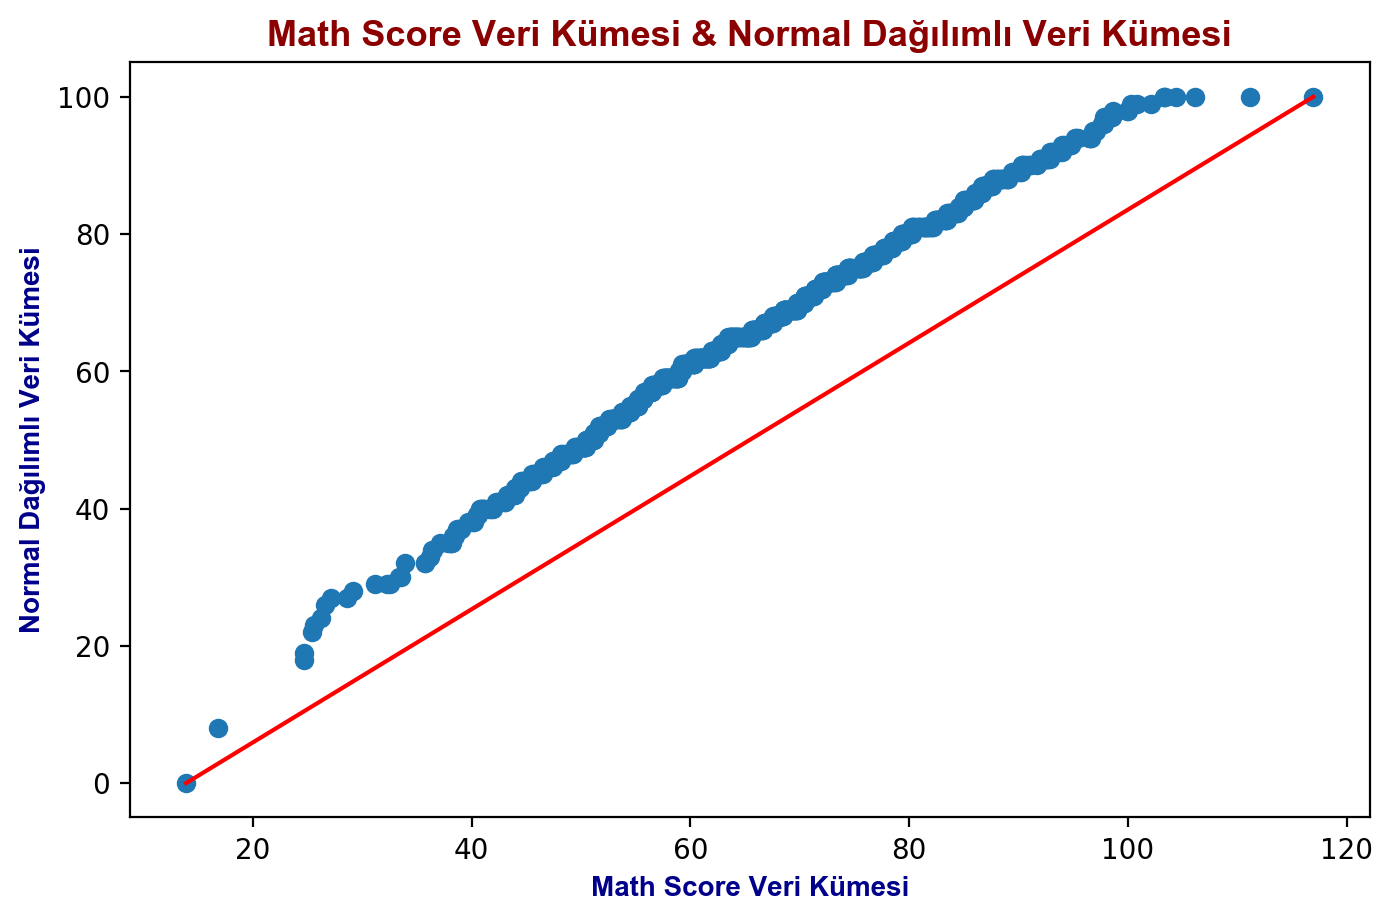

In [11]:
my=[]
x=0
i=0
while x<len(sp["math_score"]):
    my.append(sp.math_score[i])
    i+=1
    x+=1

normal_dagilimli_veri = np.random.normal(np.mean(my),
                                         np.std(my),1000)

normal_dagilimli_veri.sort()
my.sort()


plt.figure(figsize=(8,5), dpi = 200)
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }
plt.title('Math Score Veri Kümesi & Normal Dağılımlı Veri Kümesi', fontdict = baslik_font)
plt.xlabel('Math Score Veri Kümesi', fontdict = eksen_font)
plt.ylabel('Normal Dağılımlı Veri Kümesi', fontdict = eksen_font)
plt.scatter(normal_dagilimli_veri, my)
plt.plot([np.min(normal_dagilimli_veri), np.max(normal_dagilimli_veri)],
         [np.min(my), np.max(my)], c='red')
plt.show()

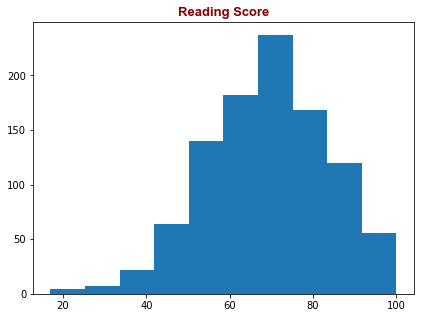

In [12]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,2)
plt.hist(sp["reading_score"])
plt.title("Reading Score", fontdict=baslik_font)
plt.show()

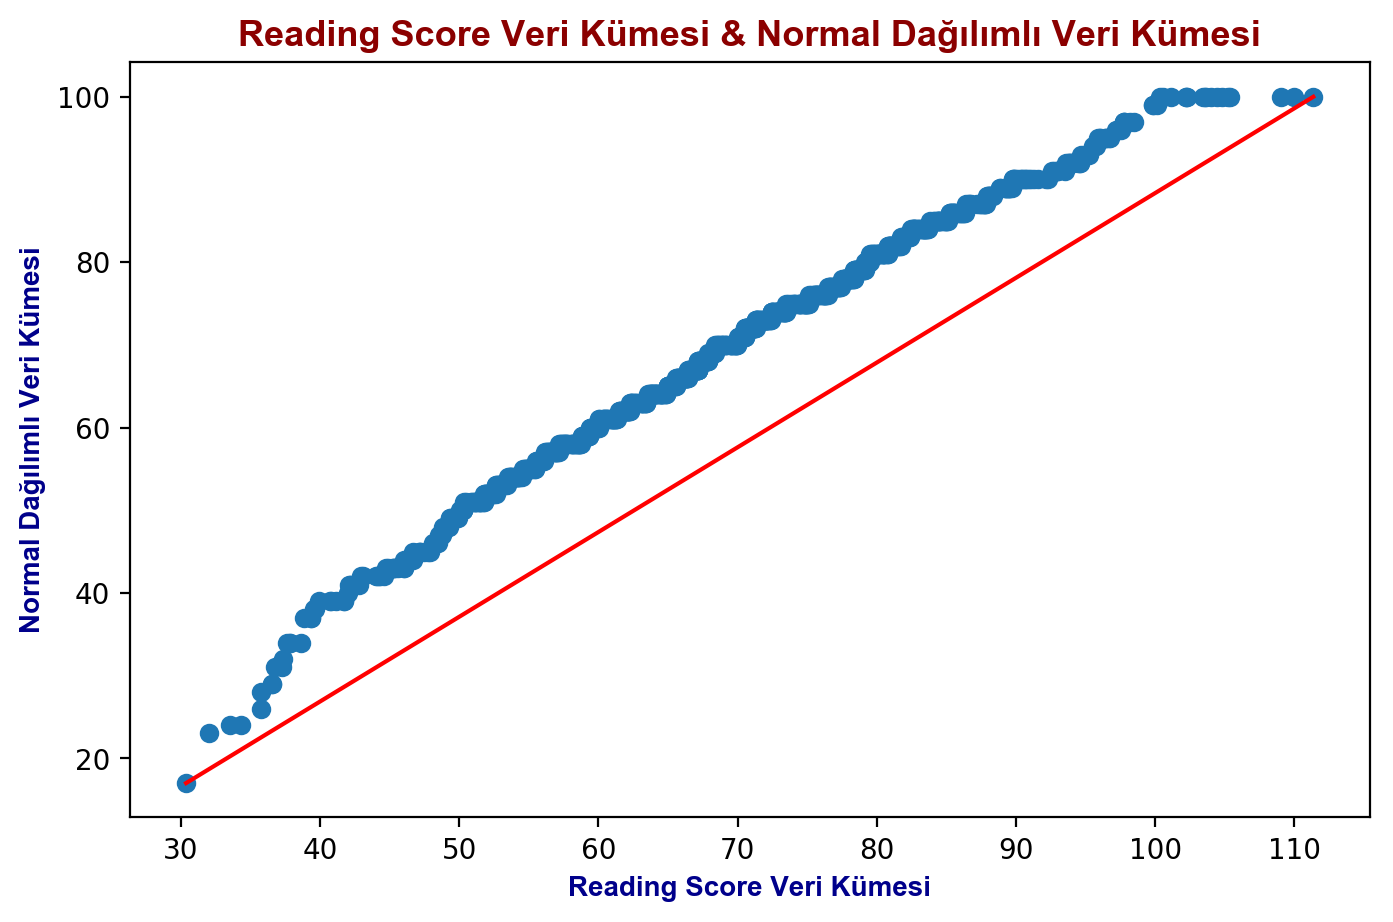

In [13]:
my2=[]
x=0
i=0
while x<len(sp["reading_score"]):
    my2.append(sp.reading_score[i])
    i+=1
    x+=1

normal_dagilimli_veri = np.random.normal(np.mean(my2),
                                         np.std(my2),1000)

normal_dagilimli_veri.sort()
my2.sort()


plt.figure(figsize=(8,5), dpi = 200)
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }
plt.title('Reading Score Veri Kümesi & Normal Dağılımlı Veri Kümesi', fontdict = baslik_font)
plt.xlabel('Reading Score Veri Kümesi', fontdict = eksen_font)
plt.ylabel('Normal Dağılımlı Veri Kümesi', fontdict = eksen_font)
plt.scatter(normal_dagilimli_veri, my2)
plt.plot([np.min(normal_dagilimli_veri), np.max(normal_dagilimli_veri)],
         [np.min(my2), np.max(my2)], c='red')
plt.show()

In [14]:
sp.writing_score+=0.001

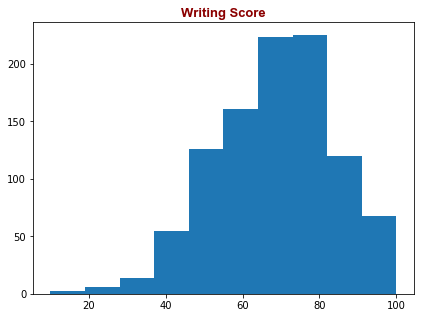

In [15]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,2)
plt.hist(sp["writing_score"])
plt.title("Writing Score", fontdict=baslik_font)
plt.show()

In [19]:
sp['Toplam_not_degerleri'] = sp['math_score']+sp['reading_score']+sp['writing_score']
sp['Ortalama'] = sp['Toplam_not_degerleri']/3
sp.head()

,Gender,Race,Parent_level,Lunch,test_preparation_course,math_score,reading_score,writing_score,aile_grup,Toplam_not_degerleri,Ortalama
0,female,group B,bachelor's degree,standard,none,72,72,74.001,4,218.001,72.667000
1,female,group C,some college,standard,completed,69,90,88.001,5,247.001,82.333667
2,female,group B,master's degree,standard,none,90,95,93.001,6,278.001,92.667000
3,male,group A,associate's degree,free/reduced,none,47,57,44.001,3,148.001,49.333667
4,male,group C,some college,standard,none,76,78,75.001,5,229.001,76.333667


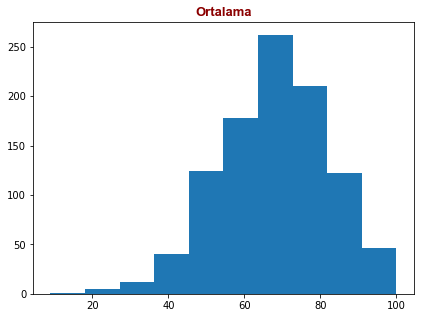

In [20]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,2)
plt.hist(sp["Ortalama"])
plt.title("Ortalama", fontdict=baslik_font)
plt.show()

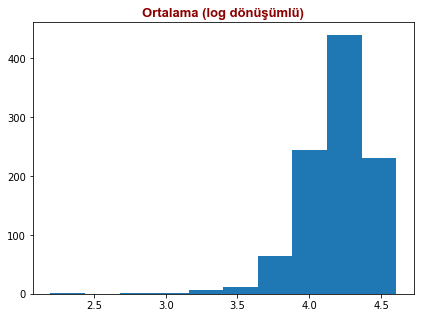

In [21]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,2)
plt.hist(np.log(sp["Ortalama"]))
plt.title("Ortalama (log dönüşümlü)", fontdict=baslik_font)
plt.show()

In [22]:
korelasyon_egitim_ogrenciler = sp.corr()
display(korelasyon_egitim_ogrenciler)

,math_score,reading_score,writing_score,aile_grup,Toplam_not_degerleri,Ortalama
math_score,1.000000,0.817580,0.802642,0.135886,0.918746,0.918746
reading_score,0.817580,1.000000,0.954598,0.147570,0.970331,0.970331
writing_score,0.802642,0.954598,1.000000,0.192926,0.965667,0.965667
aile_grup,0.135886,0.147570,0.192926,1.000000,0.167087,0.167087
Toplam_not_degerleri,0.918746,0.970331,0.965667,0.167087,1.000000,1.000000
Ortalama,0.918746,0.970331,0.965667,0.167087,1.000000,1.000000


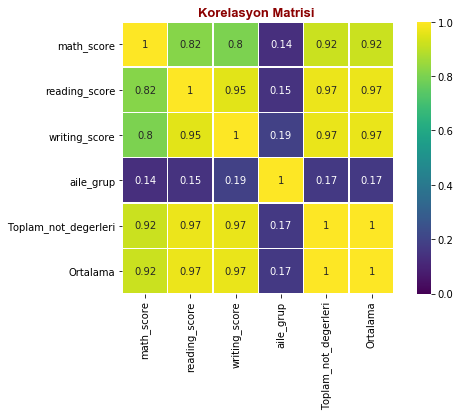

In [23]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,2)
sns.heatmap(korelasyon_egitim_ogrenciler, square=True, annot=True, linewidths=.5, vmin=0, vmax=1, cmap='viridis')
plt.title("Korelasyon Matrisi ", fontdict=baslik_font)

plt.show()

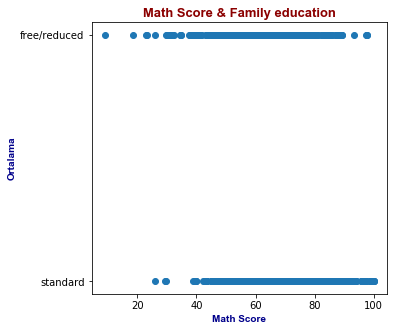

In [26]:
plt.figure(figsize=(18,5))
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.subplot(1,3,1)
plt.scatter(sp["Ortalama"], sp["Lunch"])
plt.title("Math Score & Family education", fontdict=baslik_font)
plt.xlabel('Math Score', fontdict=eksen_font )
plt.ylabel('Ortalama', fontdict=eksen_font )

plt.show()